# Exercise 1: Linear Regression

### This notebook is executed automatically.  Please comply carefully with the following instructions. Failure to comply with the instructions will result with faulty execution.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Avoid unnecessary loops.
1. You should add as many tests as you need to verify the correctness of your code. Tests will not be graded nor checked. You are allowed to add cells in the notebook for that purpose.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. Your code must run without errors. During the environment setup, you were given a specific version of python to install. Please do not change the configuration as provided.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1. Linear Regression using NumPy (40 Points)

#### It is highly recommended that you read the linear regression summary uploaded to [Piazza](https://piazza.com/class_profile/get_resource/k86egexwv2j2hy/k8ida08cf4a54d).

Simple linear regression is a linear regression model with a single explanatory variable and a single target value. 

$$
\hat{y} = h_w(x) = w^T x = b + a x_1 ~,~~~\mbox{where}~~~  w=[b, a]^T ~~\mbox{and}~~ x=[1, x_1]^T
$$

Assume a set of points $\{x^{(i)}, y^{(i)}\}_{i=1}^n$, our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $w$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(w) = \frac{1}{2m} \sum_{i=1}^{n}(h_w(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_w(x)$ is given by a **linear** model:

$$
h_w(x) = w^T x = b + a x_1
$$

$w_j$ are parameters of your model at step j and by cleverly changing those values you will be able to lower the cost function $J(w)$. One way to accomplish this is to use gradient descent:

$$
w_{j+1} = w_j - \alpha \frac{\partial J}{\partial w}  = w_j - \alpha \frac{1}{m} \sum_{i=1}^n (h_{w_j}(x^{(i)})-y^{(i)})x^{(i)}
$$

In linear regression, we know that with each step of gradient descent, the parameters $w_j$ get closer to the optimal values that will achieve the lowest cost $J(w)$.


Perform single variable linear regression using `numpy` using the following steps:

1. Create a function that takes as input the features {x}, the targets {y} and parameters (w) and calculates the loss (MSE).
1. Perform gradient descent on the training set and obtain the optimal loss values.
1. Check your result by calculating the pseudo-inverse. Do not use `np.linalg.pinv`. You should use `np.linalg.inv` to calculate the inverse and numpy operations for matrix multiplication.
1. Visualize your results using matplotlib: create a graph of the loss (seperately, for the training and validation datasets) as a function of the number of iterations. Use the optimal loss calculated using the optimal w values derived from the pseudo-inverse as a horizontal line on the same graph.
1. Visualize your iterations in the data spaces and in the parameter (weight) space in 2 dimensions: 
    1. In the weight space you should plot the loss contours and the weights (a and b) after each few iterations.
    1. In the data space you should plot the true points and the linear lines corresponding to the weight points (using the same colors as part 1).
    1. Make sure your visualization is clear and informative.
    1. Your results should look like this (note that in the figure $(b,w)$ should be $(b, a)$:

![Image](https://github.com/alono88/autoencoders/blob/master/im1.png?raw=true)

### Data generation

In [2]:
x = np.random.rand(1000, 1)
y = 1 + 2 * x + .1 * np.random.randn(1000, 1)

# Shuffles the indices
idx = np.arange(1000)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:800]
# Uses the remaining indices for validation
val_idx = idx[800:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx].reshape(-1)
x_val, y_val = x[val_idx], y[val_idx].reshape(-1)

Use the bias trick here so you could use a single dot product to calculate the predications, $\hat{y}$.

In [3]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
x_train = np.hstack((np.ones_like(x_train), x_train))
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

In [4]:
def compute_cost(X, y, w):
    """
    Part 1: calculate the cost J given the data and model parameters.
    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - w: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (scalar).
    """
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################
    total_error = np.sum(np.square(X.dot(w).flatten() - y))
    multiplier = 1/(X.shape[0] * 2)
    J = total_error* multiplier
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [5]:
np.random.seed(42)
w = np.random.random(size=2)
compute_cost(x_train, y_train, w)

0.7271552285793346

In [6]:
prev_w = []

def gradient_step(X, w, y):
    
    predictions = np.dot(X, w)
    error = predictions - y    
    return (1/X.shape[0])  * (X.T.dot(error))

def gradient_descent(X, y, w, alpha, num_iters):
    """
    Part 2: Implement simple gradient descent.
    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - w: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - w: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    J_history = [] # Use a python list to save cost in every iteration
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    iteration = 0
    length = y.shape[0]
    while iteration < num_iters:
        prev_w.append(w)
        #predictions = np.dot(X, w)
        #error = predictions - y
        #w = w - ( alpha * (1/length)  * (X.T.dot(error)))
        w = w- (alpha * gradient_step(X, w, y))
        iteration_cost = compute_cost(X, y, w)
        J_history.append(iteration_cost)
        iteration += 1
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return w, J_history

In [7]:
np.random.seed(42)
w = np.random.random(size=2)
iterations = 40000
alpha = 0.1
w, J_history = gradient_descent(x_train ,y_train, w, alpha, iterations)

In [8]:
def pinv(X, y):
    """
    Part 3: Calculate the optimal values of 
    the parameters using the pseudoinverse.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - w: The optimal parameters of your model.

    ########## DO NOT USE numpy.pinv ##############
    """
    
    pinv_w = []
    ###########################################################################
    # TODO: Implement the pseudoinverse method.                               #
    ###########################################################################
    #pass #np.linalg.inv
    pinv_w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_w

In [9]:
w_pinv = pinv(x_train, y_train)
J_pinv = compute_cost(x_train, y_train, w_pinv)

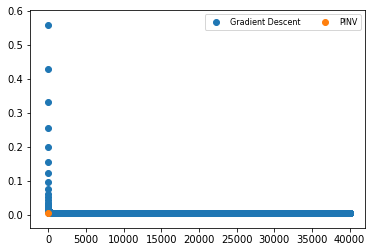

In [10]:
def visualize_loss(J_history, J_pinv=0):
    """
    Part 4: Visualize the losses as a function of the interation
    Input:
    - J_history: array that holds the loss for every iteration
    - J_pinv: the calculated loss value using pinv_w

    This function has no return value
    """
    ###########################################################################
    # TODO: visualize the loss as a function of the iteration.                #
    ###########################################################################
    
    gd = plt.scatter(range(len(J_history)), J_history, c='#1f77b4')
    pinv = plt.scatter(1, [J_pinv] , c='#ff7f0e')
        
    plt.legend((gd, pinv),
           ('Gradient Descent', 'PINV'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
visualize_loss(J_history, J_pinv)

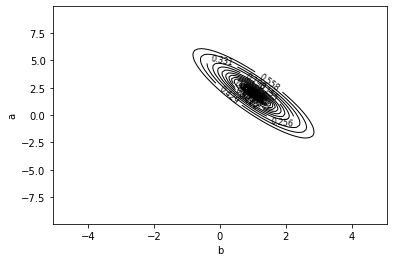

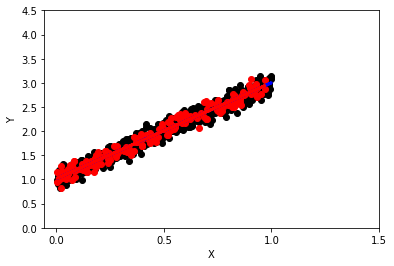

In [12]:
import numpy as np 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def contour_plot(X, y):
    all_ws = np.array(prev_w)
    
    levels = np.sort(np.array(list(set(J_history))))

    b = np.linspace(-w[0] * 5, w[0] * 5, 100)
    a = np.linspace(-w[1] * 5, w[1] * 5, 100)
    mses = np.zeros(shape=(b.size, a.size))

    for i, value1 in enumerate(b):
        for j, value2 in enumerate(a):
            mses[i, j] = compute_cost(X, y, np.array((value1,value2)))

    CS = plt.contour(b, a, mses, levels, linewidths=1,colors='black')
    plt.clabel(CS, inline=1, fontsize=8)
    plt.xlabel("b")
    plt.ylabel("a")
    plt.show()

def plotData(X, y, x_val, y_val, w):
    
    plt.scatter(X[:, 1], y,  color='black')
    predictions = np.dot(X, w).flatten()
    plt.plot(X[:, 1], predictions, color='blue', linewidth=3)
    
    #validation
    plt.scatter(x_val, y_val,  color='red')
    x_val = np.hstack((np.ones_like(x_val), x_val))
    predictions_val = np.dot(x_val, w).flatten()
    plt.plot(x_val[:, 1], predictions_val, color='red', linewidth=3)
    #valiodation
    
    plt.xticks(np.arange(0, 2., 0.5))
    plt.yticks(np.arange(0, 5., 0.5))
    plt.xlabel('X')  
    plt.ylabel('Y')
        
def visualize_spaces(X, y, w, x_val, y_val):
    """
    Part 5: Visualize the parameter weight & parameter spaces
    Input: up to you.

    This function has no return value
    """                                                        
    ###########################################################################
    # TODO: Visualize the data & parameter spaces.                            #
    ###########################################################################
    contour_plot(X, y)
    plotData(X, y, x_val, y_val, w)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
visualize_spaces(x_train, y_train, w, x_val, y_val)

## 2. Linear Regression using PyTorch (60 points)

Now that you understand basic linear regression, we can begin uncovering the benefit of using PyTorch. First, make sure you can import `pytorch` by running the next cell. Version `1.4.0` is recommended.

In [13]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
print(torch.__version__)
np.random.seed(42)

1.2.0


### Data generation

In [14]:
x = np.random.rand(1000, 1)
y = 1 + 2 * x + .1 * np.random.randn(1000, 1)

# Shuffles the indices
idx = np.arange(1000)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:800]
# Uses the remaining indices for validation
val_idx = idx[800:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

### Data Preprocessing

I have loaded the training set into tensors for you. Use a different way to load the validation set to tensors. Your code should support both `cpu` and `cuda` execution.

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

x_val;
y_val;

### Network parameters

Since we are dealing with a simple linear model, we need only two parameters.

In [16]:
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)

tensor([1.7350], requires_grad=True) tensor([-0.0767], requires_grad=True)


### Parameter update

1. Iterate over the entire dataset `num_epochs` times.
2. In each iteration, you should perform a single forward prop (on the entire dataset at once without additional loops) and calculate the average error.
3. Use the `loss.backward()` method to calculate gradients for each of the learned parameters in your model and perform the update using the provided learning rate - `lr`.
4. Reset the parameter gradients created by `.backward()`.
5. Print the learned parameters.

Answer the following questions in this markdown cell:

1. Why updating the parameters using `x = x - lr * x.grad` does not work?



2. What is the purpose of `.backward()`? Does it compute gradients for all variables in the graph? With respect to what?

In [17]:
lr = 1e-1
num_epochs = 1000

for epoch in range(num_epochs):
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################


    y_tag = x_train_tensor * a.T  + b
    diff_tensor = y_tag - y_train_tensor
    
    loss = torch.pow(diff_tensor, 2).mean()
    
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        
        a.grad.zero_()
        b.grad.zero_()
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
print(a, b)

tensor([1.9844], requires_grad=True) tensor([1.0173], requires_grad=True)


1. We need to use torch.no_grad() to keep the update out of the computation graph and 
 and when updating this way we lose the gradient that becomes None.
<br>
2. It computed the gredient to all elements with requires_grad True.
<br>
   The gradient are of the output node from which the backard was called with respsect to other leaf nodes.
   
   

### Better data handling

1. Reinitialize the learned parameters `a,b`.
1. Define a custom dataset by inheriting from the `Dataset` class available in `torch.utils.data`. Your class should take as input two numpy arrays (`x,y`) and implement three class methods:  
&nbsp;
    1. `__init__(self)` - use the init function to save the inputs as instance variables.  
    2. `__get_item__(self, index)` allows the dataset to be indexed so it behaves like a list. It can return the corresponding slices of the pre-loaded dataset or load them on demand.
    3. `__len__(self)` returns the number of instances in the dataset.    
&nbsp;
1. Use the `DataLoader` from `torch.utils.data` and iterate over the training dataset one batch at a time instead of performing full batch gradient descent. The dataloader takes the dataset as input and outputs an iterator over the data.

Answer the following questions in this markdown cell:

1. Why the data tensors were not assigned to a device as in the previous example?



2. Why do we need the `DataLoader`? Is it possible to iterate over the `Dataset` directly?

In [18]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    def __init__(self, a, b):
        self._a = a
        self._b = b
    def __getitem__(self, index):
        return self._a[index], self._b[index]
    
    def __len__(self):
        return len(self._a)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])
print(len(train_data))

(tensor([0.4174]), tensor([1.8040]))
800


1. According to pytorch documentation, it is not recommended to return CUDA tensors in multi-process loading because of many subtleties in using CUDA and sharing CUDA tensors in multiprocessing.
 Usually when assign the device later before callung to the model. 

2. Dataloader enable more than iteration over the data.
   We can split the data to batches, shuffle the data, sample the data, loading the data in parallel using multiprocessing.<br>
   
we can iterrate over the dataset directly - 
   for i in range(len(train_data)):
     sample = train_data[i]
    

In [19]:
train_loader = DataLoader(train_data, batch_size=200)

## Better loss calculation
Instead of directly calculating the loss, use the built-in MSE loss from `torch.nn`.

In [20]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
criterion = torch.nn.MSELoss()
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

## Better parameter updates
Use a suitable optimizer from `torch.optim`. Read the documentation and initiate your optimizer such that it can update the correct parameters. 

In [21]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
optimizer = torch.optim.SGD([a,b] , lr=lr)
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Before we continue, train your network again using the new building blocks (dataloader, optimizer and criterion) and make sure everything works. Explain how the batch size affects the training time in this example.

In [22]:
lr = 1e-1
num_epochs = 1000
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

for epoch in range(num_epochs):
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
    for x,y in train_loader:
        y_tag = x * a.T  + b
        loss = criterion(y_tag, y)
        loss.backward()
        with torch.no_grad():
            a -= a.grad * lr
            b -= b.grad * lr

            a.grad.zero_()
            b.grad.zero_()
        
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
print(a, b)

tensor([1.9843], requires_grad=True) tensor([1.0173], requires_grad=True)


## Defining a model

A model is represented by a python class that inherits from the [Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class from PyTorch. Every model requires two functions:
1. `__init__(self)`: defines the parameters and layers of the model.
2. `forward(self,x)`: defines the architecture of the model and outputs the prediction, given the input `x`.

Create a linear regression model using a custom class. Make sure you read about `torch.nn.Parameter` before diving in.

In [23]:
class ManualLinearRegression(nn.Module):
###########################################################################
    def __init__(self):
        super(ManualLinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
###########################################################################
###########################################################################
    def forward(self,x):
        return self.linear(x)
###########################################################################

In [24]:
model = ManualLinearRegression()
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.1880]])),
             ('linear.bias', tensor([0.1956]))])

## Putting everything together

Train your network again using the model you just defined. In addition, use both training and validation datasets to obtain the training and validation loss during training. Make sure you properly use `model.train()`, `model.eval()` and `torch.no_grad()`. Provide visualizations that demonstrate how well your network is converging. 

In [25]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
from torch.autograd import Variable


optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = torch.nn.MSELoss()

for epoch in range(num_epochs):
    for x,y in train_loader:
        x = Variable(x).to(device)
        y = Variable(y).to(device)
        
        optimizer.zero_grad()
        
        y_tag = model(x)
        loss = criterion(y_tag, y)
        loss.backward()
        optimizer.step()
        
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################